In [42]:
# manipulacao de dados
import pandas 
# computacao numerica
import numpy
# visualizacao
import matplotlib.pyplot as plt
# separar treino e teste 
from sklearn.model_selection import train_test_split
# importa regressao logista
from sklearn.linear_model import LogisticRegression
# modelo SVM
from sklearn.svm import LinearSVC
# arvore de decisao
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# florestas aleatorias e XGB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# matriz de confusao
from sklearn.metrics import confusion_matrix
# mostrar imagem
from IPython.display import Image
# obteavaliar modelo
from sklearn import metrics
import pydotplus

In [2]:
flores = pandas.read_csv('floresDados.csv')

In [3]:
flores.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
flores.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
flores

In [10]:
#Pegar a variável resposta
X = flores.drop("species", axis=1)
y = flores["species"]

In [11]:
#Separar entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Regressão logística

In [12]:
# criando o modelo
logmodel = LogisticRegression()

# treina o modelo
logmodel.fit(X_train, y_train)

# faz a previsão
predictions = logmodel.predict(X_test)

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
# analisa resultado da previsao
score = logmodel.score(X_test, y_test)
print(score)

0.9333333333333333


In [26]:
# criando o modelo
logmodel = LogisticRegression()

# treina o modelo
logmodel.fit(X_train, y_train)

# faz a previsão
predictions = logmodel.predict(X_test)

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from sklearn.metrics import plot_confusion_matrix

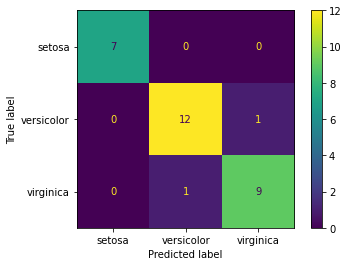

In [27]:
disp = plot_confusion_matrix(logmodel, X_test, y_test
                            #     display_labels=class_names,
                            #     cmap=plt.cm.Blues,
                            #     normalize=normalize
                            )

# SVM - Máquinas de vetores de suporte

In [33]:
svmModel = LinearSVC()

In [34]:
svmModel.fit(X_train, y_train)
y_pred = svmModel.predict(X_test)

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


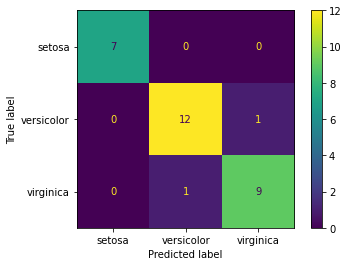

In [36]:
svmModel = LinearSVC()
svmModel.fit(X_train, y_train)
plot_confusion_matrix(svmModel, X_test, y_test)

# Árvore de decisão

In [37]:
dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [38]:
dt_train = dt.fit(X_train, y_train)

In [44]:
#dot_data = export_graphviz(dt_train, out_file=None, feature_names=list(X.columns.values), 
#                                class_names=['a', 'b', 'c'], rounded=True, filled=True)
#graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Florestas aleatórias

In [48]:
#del model
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
#target_names = ['Aceita', 'Recusada']
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.86      0.92      0.89        13
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# Gradient Boosting 

Árvores de decisão que focam nos registros que errou para tentar acertá-los.

In [50]:
#del model_GB
model_GB = GradientBoostingClassifier(n_estimators=1000)
model_GB.fit(X_train , y_train)
y_pred = model_GB.predict(X_test)
#target_names = ['Aceita', 'Recusada']
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      0.92      0.92        13
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

